---

## **1. The Snowflake Console (Snowsight) – Your Mission Control**

Think of Snowflake’s UI as a **pilot’s cockpit**. Buttons, dials, indicators — all there, but their usefulness depends on whether you know what they do.
The console isn’t just for writing SQL — it’s for managing warehouses, exploring data, visualizing insights, managing roles, monitoring usage, and even handling billing.

We’ll break this into 10+ core features.

---

## **2. Writing Queries (with Version Control)**

### **The Experience**

In Snowsight, the SQL editor is your whiteboard — but better:

* **Syntax highlighting**: Makes SQL easier to read.
* **Auto-complete**: Suggests table names, columns, and functions.
* **Multi-tab support**: Work on multiple queries in parallel.

### **Version Control**

Snowflake’s console itself **does not** offer Git-like version control natively, but:

* You can use **worksheets history** (each worksheet retains query history).
* For true versioning, integrate with GitHub via external tools (like dbt Cloud, SQLMesh, or even VS Code SQL extensions).
  So, if your “version control” note assumed built-in Git, that’s partially correct — the UI has query history per worksheet but no branching/merge.

**Case Story**
Imagine your teammate says, “Hey, that query you wrote last month to get sales by region — can you run it again?”
Instead of panicking, you just:

1. Open the worksheet.
2. Check “History” in the editor.
3. Roll back to that exact SQL.

---

## **3. Organizing Work – Folders & Worksheets**

Snowflake now allows you to:

* Create **folders** to group related worksheets.
* Name worksheets meaningfully (“Q4\_Sales\_Analysis” instead of “Untitled Worksheet”).
* Share them (we’ll get to sharing next).

**Scenario**
You’re in a retail analytics team with 10 ongoing projects:

* Folder: “Marketing”

  * Worksheet: “Campaign Performance Jan”
  * Worksheet: “Loyalty Program Impact”
* Folder: “Finance”

  * Worksheet: “Monthly P\&L”
  * Worksheet: “Tax Reporting”

This way, you avoid hunting for queries like a detective with no clues.

---

## **4. Sharing Worksheets**

Sometimes, your colleague needs the exact SQL you used — not just the results.
In Snowsight:

* **Share worksheet** → grants them view/edit rights.
* They can see the SQL, run it (with their role/warehouse), and even modify.

**Important**
Sharing only shares the *SQL*, not the data access permissions.
If they don’t have permission to the underlying table, they’ll still get “access denied.”

---

## **5. Visualizing Data**

Why stare at raw rows when you can see:

* Bar charts, line charts, scatter plots, pie charts.
* Aggregations directly in the chart builder.
* Filter interactions.

**Scenario**
Instead of downloading sales data to Excel for your boss, you:

1. Run the query in Snowsight.
2. Switch to “Chart” view.
3. Pick “Bar Chart” → X-axis: `region`, Y-axis: `sum(sales)`.
4. Done — your boss sees a colorful breakdown right in Snowflake.

---

## **6. Profiling Data**

The **Data Profiling** feature lets you:

* See column stats (min, max, avg, distinct count).
* Detect patterns (e.g., date formats, % of nulls).
* Quickly spot data quality issues.

**Example**
You open `customer_email` column and see:

* 90% have “@example.com” — suspicious → possible test data.
* 10% null → might need cleansing.

This avoids running manual `SELECT COUNT(DISTINCT ...)` every time.

---

## **7. Dynamic Filters in Queries**

While Snowsight isn’t a full BI tool, it supports **interactive filters** in visualizations:

* Create a parameterized query.
* Add a UI filter control (e.g., dropdown for “region”).
* Change it without editing SQL.

**Use Case**
Instead of creating separate queries for “East”, “West”, and “South” sales, you have one query:

```sql
SELECT * 
FROM sales
WHERE region = :selected_region;
```

The UI filter lets you switch instantly between regions.

---

## **8. Visualizing Role Hierarchy**

Snowflake’s RBAC (Role-Based Access Control) can get complex.
The UI:

* Shows which roles inherit from which.
* Lets you click and expand the hierarchy.

**Example**
You see that `ANALYST` → inherits from `READ_ONLY` → inherits from `PUBLIC`.
So, even if `ANALYST` doesn’t have `USAGE` on a warehouse directly, it may have inherited it from `READ_ONLY`.

---

## **9. Billing & User Information**

In the **Admin** section:

* **Billing & Usage**: Track credits consumption per warehouse/database.
* **User Info**: Manage users, roles, MFA, SSO.

**Case Story**
Finance says, “Why is our Snowflake bill \$500 higher this month?”
You:

1. Go to “Billing”.
2. Filter by warehouse usage.
3. See `XL_ANALYTICS` ran for 12 hours by mistake.
4. Action: Implement resource monitor.

---

## **10. Query History, Warehouse Usage & Resource Monitors**

This is the detective’s toolkit:

* **Query History**: Filter by user, time range, success/failure, warehouse.
* **Warehouse Usage**: CPU, memory, credit consumption.
* **Resource Monitors**: Automatic suspension on usage thresholds.

**Scenario**
You notice a query running for 2 hours. From history:

* User: `intern_john`.
* Query: Missing filter on `sales_date`.
* You guide him: “Always add a date range filter.”

---

## **11. Snowflake Marketplace Integration**

You can:

* Browse free & paid datasets (weather, financial, demographic).
* Instantly query them — no ETL needed.

**Example**
Your retail chain wants to correlate sales with weather.

* From Marketplace: Get “Global Weather Data”.
* Join with your sales data → see rainy days = +15% umbrella sales.

---

## **12. Extra Features**

1. **Snowsight Search Bar** – Search objects across DBs instantly.
2. **Data Sharing UI** – Share data with external accounts without copying.
3. **Tasks & Streams Monitoring** – See pipelines in UI.
4. **Alerts & Notifications** – For failed tasks or high usage.

---

## **13. Key Questions to Master**

* How does Snowflake’s worksheet history differ from true Git version control?
* Can sharing a worksheet give someone data access they don’t already have?
* How can you visualize role inheritance and why is it important?
* What’s the difference between “Query History” and “Worksheet History”?
* How do you find which warehouse caused unexpected billing spikes?
* How can you use Snowflake Marketplace without ETL?
* What scenarios benefit from data profiling before running analysis?

---


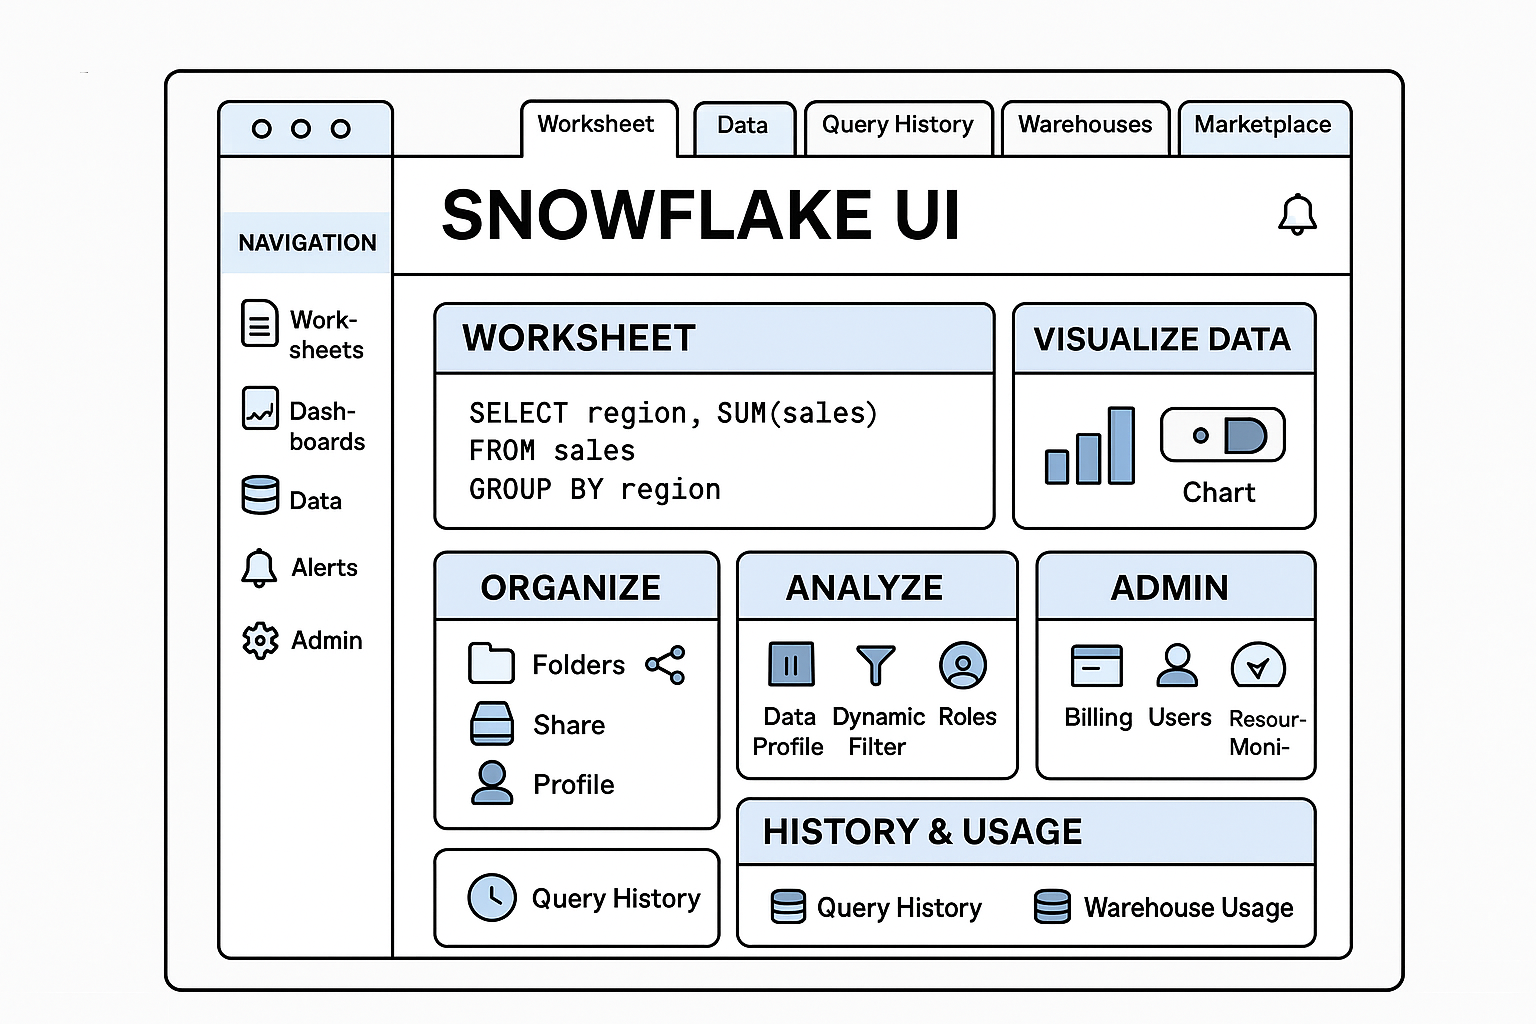



## **1. How does Snowflake’s worksheet history differ from true Git version control?**

**Worksheet History** in Snowflake:

* Remembers the queries you’ve run in that specific worksheet.
* You can go back to earlier versions **only inside that worksheet**.
* It’s tied to the browser + account — not a central repo.
* No branching, merging, or collaborative conflict resolution.

**Git Version Control**:

* Stores every change in a central repository.
* You can branch, merge, roll back, compare versions.
* Collaborators can work in parallel without overwriting each other.
* History is independent of your browser or Snowflake account.

**Real-world analogy**
Worksheet history is like having a personal diary where you scribble notes — only you see it unless you hand over the diary.
Git is like a library archive — every copy, every edit, every branch stored and accessible to the whole team.

---

## **2. Can sharing a worksheet give someone data access they don’t already have?**

**No.**
Sharing a worksheet only shares the **SQL code**, not the permissions to the data.

If the other person:

* **Has access** to the database/table → they can run it.
* **Does not have access** → they get an “insufficient privileges” error.

**Example**
You share:

```sql
SELECT * FROM sensitive_data;
```

with `Bob`.
If Bob’s role doesn’t have `SELECT` on `sensitive_data`, the query will fail for him — even though he sees the SQL.

---

## **3. How can you visualize role inheritance and why is it important?**

In Snowsight:

* Go to **Admin → Roles**.
* Click on a role to see its **hierarchy tree**.
* The UI shows “Role A inherits from Role B, inherits from Role C…”

**Why it’s important**:

* Helps troubleshoot **unexpected permissions** (Why can this role query that table?).
* Ensures **least privilege principle** by removing unnecessary inherited grants.
* Useful when onboarding a new user — you can pick a role that already has required access.

**Case Story**
Your “READ\_ONLY” role unexpectedly runs a CREATE TABLE.
You check the hierarchy and find it inherits from “DEVELOPER\_ROLE” — problem spotted.

---

## **4. What’s the difference between “Query History” and “Worksheet History”?**

**Query History** (global):

* Shows *all* queries run in the account (or by a role/user, based on filters).
* Includes queries from other worksheets, scripts, and external tools.
* Useful for auditing and troubleshooting.

**Worksheet History** (local):

* Shows only queries run in that specific worksheet.
* More like a per-project local history.

**Analogy**
Query history is like CCTV footage of the whole office.
Worksheet history is your personal desk camera.

---

## **5. How do you find which warehouse caused unexpected billing spikes?**

Steps:

1. Go to **Admin → Usage → Warehouses**.
2. Sort by **credits consumed** in the given billing period.
3. Identify the warehouse with unusually high usage.
4. Drill down to **Query History** filtered by that warehouse → see which queries were run, by whom, and for how long.

**Pro Tip**
Set up **Resource Monitors** to auto-suspend a warehouse when it exceeds a credit threshold.

---

## **6. How can you use Snowflake Marketplace without ETL?**

Snowflake Marketplace datasets:

* Appear as “shared databases” in your account when subscribed.
* You query them **in place** — no need to copy or transform data.
* Often updated automatically by the provider.

**Example**
You subscribe to a “US Demographics” dataset.
It shows up as `MARKETPLACE.US_DEMOGRAPHICS` in your account.
You join it directly with:

```sql
SELECT c.city, d.population, SUM(s.sales)
FROM mydb.sales s
JOIN marketplace.us_demographics d 
  ON s.city = d.city;
```

No staging, no pipelines — instant use.

---

## **7. What scenarios benefit from data profiling before running analysis?**

Data profiling is best when:

1. **You’ve received new data from external sources** – check for nulls, unexpected values.
2. **Before building dashboards** – ensure field types and ranges are correct.
3. **During data quality audits** – find anomalies like outliers or inconsistent formats.
4. **When investigating data drift** – e.g., sudden spike in negative values for a sales column.

**Example**
Before analyzing `customer_age` in a marketing dataset, profiling reveals:

* Some ages = 999 (invalid placeholder).
* Some null values.
* Min = 18, Max = 72 (reasonable after cleaning).

---
